In [2]:
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [1]:
c9_meta = read.csv("/data1/APA/Paul_ALS_Data/bams_in/subscelltype_bamfiles/Mapper_outs/V2/C9ALS_All_labels.csv")
sA_meta = read.csv("/data1/APA/Paul_ALS_Data/bams_in/subscelltype_bamfiles/Mapper_outs/V2/sALS_All_labels.csv")

In [4]:
c9_bulk_perf = read.csv('C9ALS_test_set_correlation.csv')
sA_bulk_perf = read.csv('sALS_test_set_correlation.csv')
c9_CT_perf = read.csv('C9ALS_test_set_correlation_celltypes.csv')
sA_CT_perf = read.csv('sALS_test_set_correlation_celltypes.csv')

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



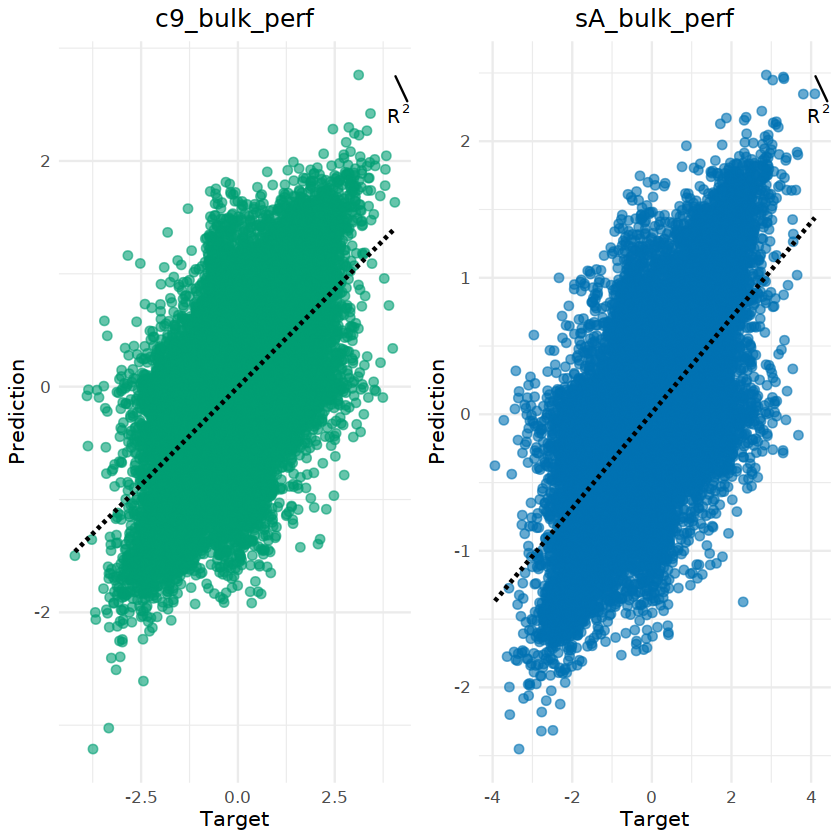

In [9]:
library(ggplot2)
library(gridExtra)
library(ggpubr)
library(ggrepel)

# Function to improve plot aesthetics
improve_plot <- function(df, title, color) {
  p <- ggplot(df, aes(x = target, y = pred)) +
    geom_point(color = color, alpha = 0.6, size = 2) +
    geom_smooth(method = lm, col = "black", linetype = "dashed", se = FALSE) +
    stat_cor(method = "pearson", aes(label = paste(..rr.label.., ..p.label.., sep = "~`,`~")), 
             label.x.npc = "right", label.y.npc = "top", geom = "text_repel") +
    labs(title = title, x = "Target", y = "Prediction") +
    theme_minimal() +
    theme(text = element_text(size=12),
          plot.title = element_text(hjust = 0.5))
  return(p)
}

# Create plots for each dataframe
p1 <- improve_plot(c9_bulk_perf, "c9_bulk_perf", "#009E73")
p2 <- improve_plot(sA_bulk_perf, "sA_bulk_perf", "#0072B2")

# Combine the plots
grid.arrange(p1, p2, ncol = 2)


`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



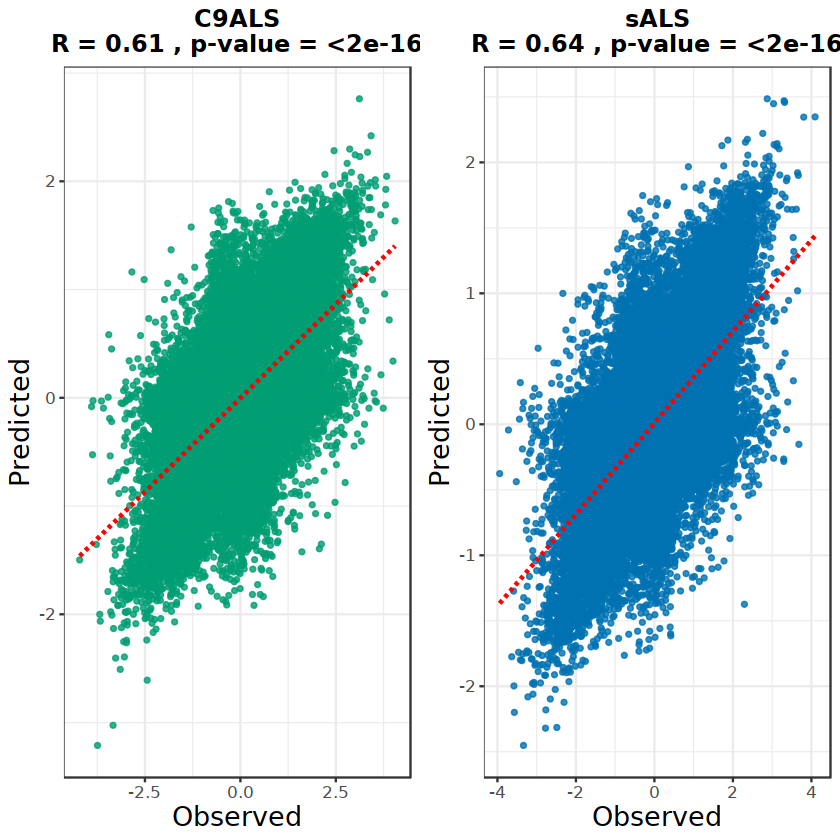

In [22]:
library(ggplot2)
library(gridExtra)
library(ggpubr)
library(ggrepel)

# Function to calculate correlation
calculate_cor <- function(df) {
  cor_res <- cor.test(df$target, df$pred)
  return(paste("R =", round(cor_res$estimate, 2), ", p-value =", format.pval(cor_res$p.value, digits = 2)))
}

# Function to improve plot aesthetics
improve_plot <- function(df, title, color) {
  correlation <- calculate_cor(df)
  p <- ggplot(df, aes(x = target, y = pred)) +
    geom_point(color = color, alpha = 0.8, size = 1) +
    geom_smooth(method = lm, col = "red", linetype = "dashed", se = FALSE) +
    # add \n between title and correlation to get a new line
    labs(title = paste0(title, "\n", correlation), x = "Observed", y = "Predicted") +
    theme_bw() +
    theme(
      text = element_text(size = 12),
      plot.title = element_text(size = 14, face = "bold", hjust = 0.5),
      axis.title.x = element_text(size = 16),
      axis.title.y = element_text(size = 16),
      strip.text = element_text(size = 16, face = "bold"),
      legend.title = element_text(size = 12),
      legend.text = element_text(size = 12)
    )
  return(p)
}

# Create plots for each dataframe
p1 <- improve_plot(c9_bulk_perf, "C9ALS", "#009E73")
p2 <- improve_plot(sA_bulk_perf, "sALS", "#0072B2")

# Combine the plots
p_combined <- grid.arrange(p1, p2, ncol = 2)

# Save the plot
ggsave("/data1/APA/Paul_ALS_Data/bams_in/subscelltype_bamfiles/Mapper_outs/results/plots/performance_scatter_plot.pdf", p_combined, width = 20, height = 10, dpi = 300)


In [26]:
calculate_cor <- function(df) {
  cor_res <- cor.test(df$target, df$pred)
  return(data.frame(r = round(cor_res$estimate, 2), 
                    p_value = format.pval(cor_res$p.value, digits = 2)))
}

c9_correlations <- c9_CT_perf %>%
  group_by(celltype) %>%
  do(calculate_cor(.))

sA_correlations <- sA_CT_perf %>%
  group_by(celltype) %>%
  do(calculate_cor(.))

# print(c9_correlations)
print(sA_correlations)

# A tibble: 14 × 3
# Groups:   celltype [14]
   celltype             r p_value
   <chr>            <dbl> <chr>  
 1 AST-FB            0.61 9.4e-16
 2 AST-PP            0.62 <2e-16 
 3 Astrocytes        0.62 <2e-16 
 4 Excitatory        0.61 <2e-16 
 5 IN-PV             0.63 <2e-16 
 6 IN-SST            0.71 <2e-16 
 7 IN-VIP            0.49 <2e-16 
 8 Inhibitory        0.67 <2e-16 
 9 L2-3              0.62 <2e-16 
10 L4                0.64 <2e-16 
11 L5-6-CC           0.5  0.1    
12 Microglia         0.61 <2e-16 
13 Oligodendrocytes  0.68 <2e-16 
14 OPC               0.62 <2e-16 


In [28]:
head(c9_meta)

,X,switch_id,switch_inx,celltype,APA_lfc
,<int>,<chr>,<int>,<chr>,<dbl>
1,0,chr12:AACS:125140928:125143316:+,0,AST-PP,0.3588506
2,1,chr12:AACS:125140928:125143316:+,0,Astrocytes,-0.2823959
3,2,chr12:AACS:125140928:125143316:+,0,Excitatory,-1.2738542
4,3,chr12:AACS:125140928:125143316:+,0,IN-SST,0.4785049
5,4,chr12:AACS:125140928:125143316:+,0,Inhibitory,0.3822852
6,5,chr12:AACS:125140928:125143316:+,0,L2-3,-1.1224043


In [38]:
library(dplyr)
library(reshape2)
library(ggplot2)
library(corrplot)

# Assume c9meta and sAmeta are your dataframes
all_celltypes <- c9_meta

# Create a zero matrix
meta_matrix <- matrix(0, nrow = length(unique(all_celltypes$switch_id)), 
                      ncol = length(unique(all_celltypes$celltype)))
rownames(meta_matrix) <- unique(all_celltypes$switch_id)
colnames(meta_matrix) <- unique(all_celltypes$celltype)

# Fill the matrix
for (celltype in unique(all_celltypes$celltype)){
  switch_ids <- all_celltypes[all_celltypes$celltype == celltype, "switch_id"]
  APA_lfc <- all_celltypes[all_celltypes$celltype == celltype, "APA_lfc"]
  meta_matrix[switch_ids, celltype] <- APA_lfc
}

# Convert the matrix to a dataframe
c9meta_df <- as.data.frame(meta_matrix)
head(c9meta_df)



,AST-PP,Astrocytes,Excitatory,IN-SST,Inhibitory,L2-3,OPC,Oligodendrocytes,IN-PV,IN-VIP,L4,Microglia,AST-FB,L5-6,L5-6-CC
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr12:AACS:125140928:125143316:+,0.3588506,-0.2823959,-1.2738542,0.4785049,0.3822852,-1.12240428,0.2627225,1.0934857,0.0000000,0.0000000,0.00000000,0.0000000,0,0,0
chr4:AADAT:170060271:170060673:-,-0.4083650,-0.6337519,0.0000000,0.8692224,1.7821535,0.00000000,-0.7961907,1.6905546,1.3333074,2.3203689,0.00000000,0.0000000,0,0,0
chr2:AAK1:69457997:69461526:-,1.7257031,1.6352375,-0.1125499,0.6779079,1.0701133,-0.09731815,0.5135110,0.6790952,0.9160503,1.4271457,0.41846661,1.4266033,0,0,0
chr2:AAK1:69457997:69464011:-,0.8587777,-0.5169031,-0.8574120,0.8450408,1.1760853,-0.87600185,0.6420615,0.6023383,0.3159596,1.2505491,0.02135555,0.7405839,0,0,0
chr2:AAK1:69457997:69465314:-,0.0000000,0.0000000,0.0000000,1.9975104,0.0000000,0.00000000,0.0000000,0.0000000,0.0000000,0.0000000,0.00000000,0.0000000,0,0,0
chr2:AAK1:69457997:69467864:-,0.9375180,0.8502071,-1.3023209,0.1149430,0.2813216,-1.48281049,0.0000000,0.4713394,0.1229395,0.5319041,0.00000000,0.6367951,0,0,0


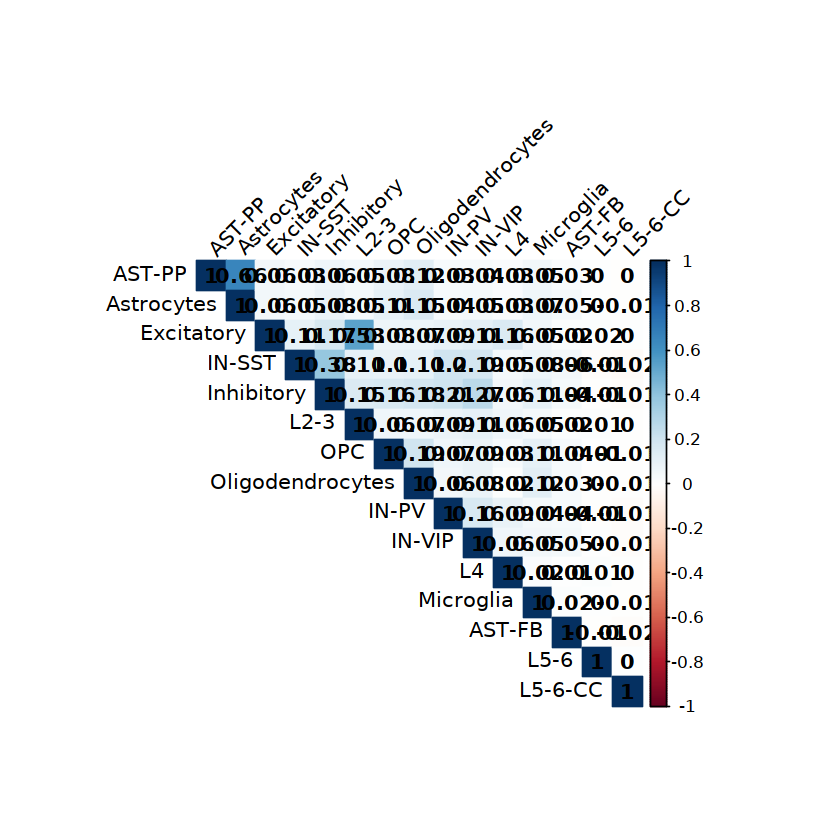

In [43]:
# Calculate correlation matrix and add a 'model_performance' column
corr <- cor(c9meta_df, use = "complete.obs")  # calculate correlations
corr <- as.matrix(corr)  # convert to matrix (required by corrplot)
corr <- rbind(corr, rep(0, ncol(corr)))  # add a row of zeros
# rownames(corr)[nrow(corr)] <- 'model_performance'  # rename the last row

# Update model performance values
# corr['model_performance', names(celltype_performances)] <- celltype_performances

# Create a heatmap
corrplot(corr, method="color", type="upper", addCoef.col = "black", 
         tl.col="black", tl.srt=45)


In [ ]:
# Assuming 'c9_correlation' and 'sA_correlation' have the same structure as 'correlations' above
c9_performance <- c9_correlation$r
sA_performance <- sA_correlation$r

# combine performances
celltype_performances <- c(c9_performance, sA_performance)
names(celltype_performances) <- c(c9_correlation$celltype, sA_correlation$celltype)



# Calculate correlation matrix and add a 'model_performance' column
corr <- cor(meta_df, use = "complete.obs")  # calculate correlations
corr <- as.data.frame(corr)  # convert to dataframe
corr$model_performance <- 0  # add new column with zeros
corr[names(celltype_performances), "model_performance"] <- celltype_performances  # update values

# Create a heatmap
corrplot(corr, method="color", type="upper", addCoef.col = "black", 
         tl.col="black", tl.srt=45)

# Save the plot
# ggsave("PA_regPred_correlation.png", dpi = 300)
